# Support Vector Machine


In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df= pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### seperate x and y

In [5]:
x= df.drop(columns=['species'],axis=1)
y= df[['species']]

In [6]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [8]:
y.value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

### Apply Labelencodig to y features

In [9]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
y['species']= le.fit_transform(y['species'])

In [10]:
y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [11]:
y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

In [12]:
#species   
#setosa        0
#versicolor    1
#virginica     2

### Preprocessing of x features

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [14]:
num_pipe= Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                          ('scaler',StandardScaler())])

In [15]:
x_pre= num_pipe.fit_transform(x)
x_pre[0:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [16]:
cols= num_pipe.get_feature_names_out()

In [17]:
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [18]:
x_pre= pd.DataFrame(x_pre,columns=cols)
x_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x_pre,y,test_size=0.2,random_state=45)

In [20]:
xtrain.shape

(120, 4)

In [21]:
xtest.shape

(30, 4)

### Create SVm model

In [22]:
from sklearn.svm import SVC
model= SVC()
model.fit(xtrain,ytrain)

SVC()

In [23]:
model.score(xtrain,ytrain)

0.975

In [24]:
model.score(xtest,ytest)

0.9666666666666667

### Here no neeed to tune parameter in svm


In [25]:
ypred_tr = model.predict(xtrain)
ypred_ts= model.predict(xtest)


In [26]:
ypred_tr

array([1, 1, 1, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1,
       1, 0, 0, 2, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1,
       1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2,
       0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 2, 1, 1, 0, 2, 2])

In [27]:
ypred_ts

array([0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 0, 1, 1, 1,
       2, 1, 0, 2, 1, 1, 0, 1])

In [28]:
ytrain.head()

,species
76,1
96,1
119,2
101,2
25,0


In [29]:
ytest.head()

,species
0,0
43,0
129,2
3,0
34,0


### Plot the confusion matrix


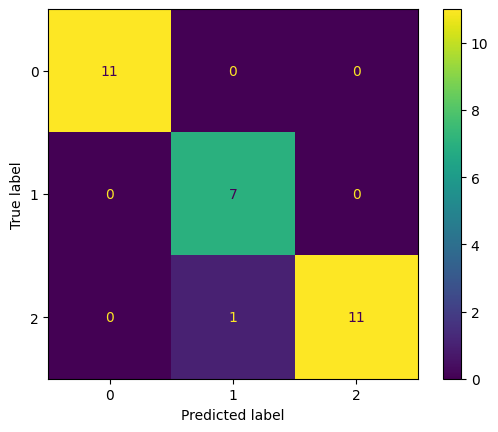

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

### Print Classification Report

In [31]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.88      1.00      0.93         7
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



### Inverse to original labels

In [32]:
ypred_tr_lb= le.inverse_transform(ypred_tr)
ypred_ts_lb= le.inverse_transform(ypred_ts)

In [33]:
ypred_tr_lb

array(['versicolor', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'setosa', 'virginica', 'setosa',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'setosa', 'versicolor', 'virginica',
       'virginica', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'virginica', 'versicolor',
       'versicolor', 'virginica', 'virginica', 'virginica', 'setosa',
       'setosa', 've

In [34]:
ypred_ts_lb

array(['setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'virginica', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'virginica', 'versicolor', 'setosa',
       'virginica', 'virginica', 'setosa', 'versicolor', 'versicolor',
       'versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'setosa', 'versicolor'], dtype=object)

### prediction for new Data

In [35]:
df2= pd.read_csv('sample.csv')
df2.head()

,sepal_length,sepal_width,petal_length,petal_width
0,4.9,3.6,1.4,0.1
1,4.7,3.2,1.6,0.2
2,5.1,3.4,1.5,0.2
3,5.5,2.4,3.8,1.1
4,6.9,3.1,5.1,2.3


In [36]:
xnew_pre= num_pipe.transform(df2)
xnew_pre

array([[-1.14301691,  1.24920112, -1.34022653, -1.44707648],
       [-1.38535265,  0.32841405, -1.22655167, -1.3154443 ],
       [-0.90068117,  0.78880759, -1.2833891 , -1.3154443 ],
       [-0.41600969, -1.51316008,  0.02387172, -0.13075464],
       [ 1.2803405 ,  0.09821729,  0.76275827,  1.44883158],
       [ 1.2803405 ,  0.09821729,  0.93327055,  1.18556721],
       [-1.74885626, -0.13197948, -1.39706395, -1.3154443 ],
       [-1.02184904, -1.74335684, -0.26031542, -0.26238682],
       [ 0.79566902, -0.13197948,  0.99010798,  0.79067065],
       [-0.90068117,  1.01900435, -1.34022653, -1.3154443 ]])

In [37]:
xnew= pd.DataFrame(xnew_pre, columns=cols)
xnew.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-1.143017,1.249201,-1.340227,-1.447076
1,-1.385353,0.328414,-1.226552,-1.315444
2,-0.900681,0.788808,-1.283389,-1.315444
3,-0.416010,-1.513160,0.023872,-0.130755
4,1.280340,0.098217,0.762758,1.448832


In [38]:
pred= model.predict(xnew)

In [39]:
pred

array([0, 0, 0, 1, 2, 2, 0, 1, 2, 0])

In [41]:
pred_lb= le.inverse_transform(pred)
pred_lb

array(['setosa', 'setosa', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'setosa'],
      dtype=object)

In [43]:
df2['predictions']= pred_lb

In [44]:
df2

,sepal_length,sepal_width,petal_length,petal_width,predictions
0,4.9,3.6,1.4,0.1,setosa
1,4.7,3.2,1.6,0.2,setosa
2,5.1,3.4,1.5,0.2,setosa
3,5.5,2.4,3.8,1.1,versicolor
4,6.9,3.1,5.1,2.3,virginica
5,6.9,3.1,5.4,2.1,virginica
6,4.4,3.0,1.3,0.2,setosa
7,5.0,2.3,3.3,1.0,versicolor
8,6.5,3.0,5.5,1.8,virginica
9,5.1,3.5,1.4,0.2,setosa
